# Experimento estocástico

## Midiendo con un cronómetro

Para introducir errores estocásticos o estadísticos, realizaremos un experimento entre todos: medir con un cronómetro el intervalo de tiempo entre dos eventos. En particular, el tiempo que transcurre entre dos chasquidos de los dedos.

Una vez realizado el experimento, ¿qué valor reportarían y con qué error?

Supongamos que su cronómetro marcó $1.03$ segundos.

Haciendo una analogía con el caso de la regla, estaríamos tentados a decir que el error viene dado por el último decimal del cronómetro, es decir, la resolución del instrumento. En este caso, la resolución sería la centésima de segundo, $0.01$ segundos, y reportaríamos $(1.03 \pm 0.01)$ s.

Pero tenemos múltiples mediciones de la misma magnitud, el mismo intervalo de tiempo, realizadas por sus compañeres. ¿Creen que les habrá dado a todes igual?

Lo más probable es que no, y que, por ejemplo, alguien haya medido $1.09$ s, que no sería *compatible* con $1.03$ s si las incertezas fuesen de $0.01$ s; no se solaparían los intervalos.

Pero si todes medimos el mismo fenómeno y las mediciones no son compatibles, debe ser que estamos subestimando la incerteza de nuestras mediciones. Por lo tanto, **es fundamental repetir el experimento**, para ver si hay fuentes de errores que no estamos teniendo en cuenta.

Entonces, ¿qué valor y qué error reportamos?

## Analizando mediciones

Para analizar las mediciones, usaremos dos paquetes de Python fundamentales para el análisis de datos:

- `numpy`: para hacer cálculos con listas de números
- `matplotlib`: para realizar gráficos

Además, usaremos `ipywidgets` para generar elementos interactivos.

In [1]:
import ipywidgets
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

Supongamos que realizamos las siguientes 30 mediciones, que guardamos en un array de NumPy:

In [2]:
# fmt: off
periodos = np.array([
    1.03, 1.09, 1.18, 1.19, 1.03,
    1.12, 1.26, 1.16, 1.16, 0.97,
    0.96, 1.04, 1.21, 1.11, 1.10,
    1.16, 1.07, 1.15, 1.08, 1.03,
    1.08, 1.09, 1.21, 1.20, 1.23,
    1.05, 1.02, 1.06, 1.19, 1.02,
])
# fmt: on

Las primeras preguntas que se podrían hacer son:

- ¿Hay algún valor o rango de valores que concentre la mayoría de las mediciones?
- ¿Hay alguna mediciön muy alejada del resto, de alguien que haya "medido mal"?

Es decir, ¿son razonables dichas mediciones?

Sin embargo, es dificil contestar estas preguntas a partir de una lista de números. Una mejor forma es realizando un gráfico, que es **lo primero que tienen que hacer al analizar un conjunto de datos**.

Pero, ¿qué gráfico?

## Reportando un gráfico

### Line plot o gráfico de linea

La función más básica para realizar gráficos es `plot`, que realiza gráficos de línea. Para ello, toma pares ordenados de puntos $(x, y)$, los grafica y une con una linea. Por ejemplo, grafiquemos $y = \cos (x)$:

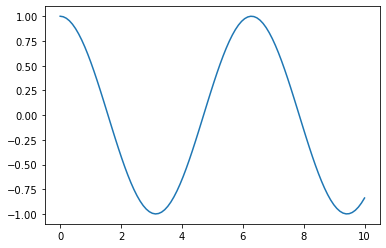

In [3]:
x = np.linspace(0, 10, 100)  # [0, 0.1, ..., 10]
y = np.cos(x)  # [cos(0), cos(0.1), ..., cos(10)]
plt.plot(x, y)

*Tip:* para ver donde están los puntos, se puede pasar un tercer parámetro `plt.plot(x, y, "o-")`

En nuestro experimento no hay pares de valores `(x, y)`, sino que solo tenemos `y`, los periodos medidos.

Si no pasamos un valor para `x`, la función automáticamente asigna valores de $0$ a $N-1$ para `x`, donde $N$ es la cantidad de mediciones. Se produce un gráfico donde en el eje vertical se encuentra el periodo medido, y en el eje horizontal, el *número de medición*:

Text(0, 0.5, 'Periodo [s]')

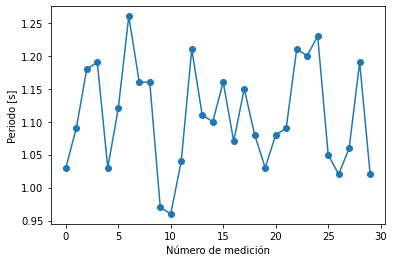

In [4]:
plt.plot(periodos, "o-")
plt.xlabel("Número de medición")
plt.ylabel("Periodo [s]")

Sin embargo, esta no es una buena manera de mostrar estos datos. Este tipo de gráficos da a entender que, si se realizara una medición entre dos puntos, caeria sobre la linea que los une. Es mejor reservar el gráfico de linea a gráficos de *modelos teóricos*, en lugar de mediciones experimentales.

### Scatter plot o gráfico de dispersión

Otra opción es hacer un *scatter plot*, que grafica puntos $(x, y)$, pero sin unirlos con una linea:

Se puede hacer así:

```python
plt.plot(periodos, "o")
```

O, con la función `plt.scatter`, que requiere que le pasemos explícitamente los valores de `x`:

Text(0, 0.5, 'Periodo [s]')

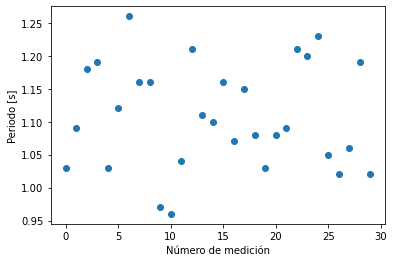

In [5]:
numero_de_medicion = np.arange(periodos.size)  # [0, 1, ..., N-1]
plt.scatter(numero_de_medicion, periodos)
plt.xlabel("Número de medición")
plt.ylabel("Periodo [s]")

Cuando sabemos cuál es el error de cada punto, se suele hacer un gráfico con barras de error con la función `plt.errorbar`:

Text(0, 0.5, 'Periodo [s]')

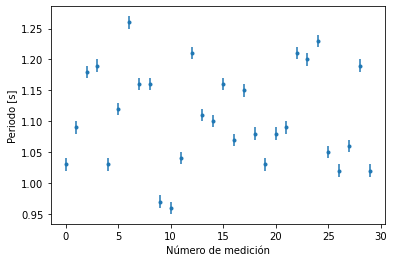

In [6]:
plt.errorbar(numero_de_medicion, periodos, yerr=0.01, fmt=".")
plt.xlabel("Número de medición")
plt.ylabel("Periodo [s]")

que en este caso permite apreciar facilmente que los intervalos de las distintas mediciones no coinciden.

Un *scatter plot* es un buen gráfico para ver si hay una relación entre dos variables. Por ejemplo, si las mediciones variaran en función del tiempo, podríamos ver algo así:

Text(0, 0.5, 'Periodo [s]')

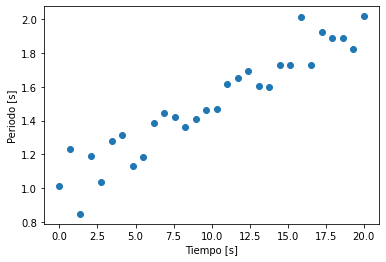

In [7]:
x = np.linspace(0, 20, 30)
y = np.linspace(1, 2, x.size) + np.random.normal(scale=0.1, size=x.size)
plt.scatter(x, y)
plt.xlabel("Tiempo [s]")
plt.ylabel("Periodo [s]")

Sin embargo, no es lo que sucede en nuestro experimento. Nuestra variable del eje $x$, el número de medición, es arbitraria: corresponde a que estudiante realizó cada medición. La ubicación en el eje horizontal podríamos reordenarla como quisieramos. Como solo nos interesa lo que pasa en el eje vertical, podríamos "borrar" la información del eje horizontal, y asignarle $x=0$ a todos los puntos:

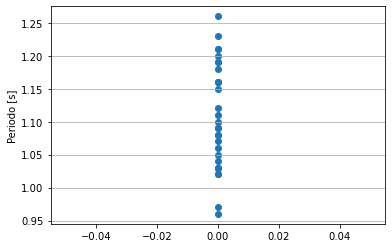

In [8]:
plt.scatter(np.zeros_like(periodos), periodos)
plt.ylabel("Periodo [s]")
plt.grid(axis="y")

De este gráfico, podriamos ver en qué valores se agrupan más mediciones. Pero se puede hacer mejor con el siguiente tipo de gráfico.

### Histograma

Un histograma es una **representación de la distribución de los datos**. Para construirlo, se dividen los datos en un conjunto de intervalos y se cuentan cuantos valores caen en cada intervalo. Generalmente, se muestra como un gráfico de barras, donde se coloca una barra para cada intervalo y la altura de cada barra viene dada por la cantidad de datos en su correspondiente intervalo.

Text(0, 0.5, 'Cantidad de mediciones')

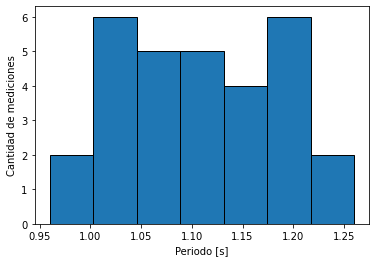

In [9]:
plt.hist(periodos, bins=7, edgecolor="black")
plt.xlabel("Periodo [s]")
plt.ylabel("Cantidad de mediciones")

A diferencia de los gráficos anteriores, hacer un histograma requiere de una elección *arbitraria* del ancho de los intervalos. Hay diversas reglas automáticas para elegirlo, pero ninguna es infalible.

En particular, con pocos datos, es más díficil elegir un número de *bins* bueno. Podemos generar más datos para ver como influye variar la cantidad de *bins*:

[Text(0.5, 1.0, 'Demasiados bins')]

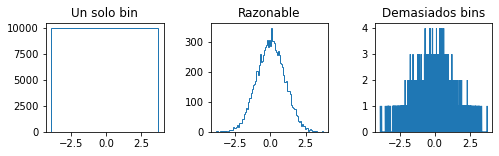

In [10]:
x = np.random.normal(size=10_000)

fig, axes = plt.subplots(1, 3, gridspec_kw={"wspace": 0.4}, figsize=(8, 2))

bins = (1, np.sqrt(x.size), 10 * x.size)

for ax, b in zip(axes, bins):
    ax.hist(x, bins=int(b), histtype="step")

axes[0].set(title="Un solo bin")
axes[1].set(title="Razonable")
axes[2].set(title="Demasiados bins")

En el extremo de un único intervalo, el histograma solamente nos dice cuántos datos tenemos. En el otro extremo, demasiados intervalos, vemos donde está cada punto, pero no nos permite ver la densidad de puntos. El valor ideal está en un punto intermedio, que nos permite evaluar como varia la densidad de datos.

Si están corriendo el *notebook*, pueden variar la cantidad de intervalos con el *slider*:

In [11]:
@ipywidgets.interact(bins=ipywidgets.FloatLogSlider(100, min=0, max=5))
def _(bins):
    plt.hist(x, bins=int(bins), histtype="step")

interactive(children=(FloatLogSlider(value=100.0, description='bins', max=5.0), Output()), _dom_classes=('widg…

Un histograma es un buen resumen gráfico de un set de mediciones *equivalentes*, es decir, que representan el mismo *valor real* subyacente. Por ejemplo, las mediciones del intervalo de tiempo entre los dos chasquidos.

Pero, si realizamos muchos experimentos, no vamos a mostrar un histograma para cada uno. ¿Podemos resumir aún más los datos?

En particular, si tuviesen que resumir dicha campana de manera textual, ¿cómo la describirian?

## Reportando un intervalo

Una forma de resumir las mediciones es reportar un intervalo. Es decir, condensamos todas las mediciones en dos números: los extremos del intervalo, o, más comúnmente, el centro y el ancho del intervalo.

### Medidas de centralidad

Para elegir un valor para el centro, hay varias [medidas de centralidad](https://en.wikipedia.org/wiki/Central_tendency#Measures), cada una con distintos criterios y propiedades. Las más utilizadas son soluciones a la pregunta: ¿cuál es el valor que está "más cerca" de todos?

Parece un criterio razonable, pero: ¿cómo lo calculamos?

Supongamos que tenemos $N$ mediciones $x_i$: $\{x_1, x_2, ..., x_N\}$, y queremos determinar *el centro* $c$. Primero, calculemos las distancias $d_i$ de nuestras $N$ mediciones $x_i$ a ese valor $c$:

$$d_i = |x_i - c|$$ 

con $i$ de $1$ a $N$.

Gráficamente, es la distancia (vertical) de los puntos azules a la linea naranja en el siguiente gráfico:

In [12]:
c_min, c_max = 0.9 * periodos.min(), 1.1 * periodos.max()


@ipywidgets.interact(c=(c_min, c_max, (c_max - c_min) / 10))
def _(c):
    plt.errorbar(
        np.arange(periodos.size),
        periodos,
        yerr=(periodos - c, np.zeros_like(periodos)),
        fmt="o",
        label="Distancias $d_i$",
    )
    plt.axhline(c, color="orange", label="Centro $c$")

    plt.xlabel("Número de medición")
    plt.ylabel("Periodo [s]")
    plt.ylim(c_min, c_max)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

interactive(children=(FloatSlider(value=1.0728, description='c', max=1.3860000000000001, min=0.864, step=0.052…

¿Cómo elegimos el mejor $c$, el óptimo?

Una opción sería elegir $c$ tal que minimize la suma de las distancias:

$$\begin{align}
\sum_i d_i &= d_1 + \ldots + d_N
\\         &= |x_1 -c| + \ldots + |x_N-c|
\end{align}$$

que daría lugar a que $c$ es la [mediana](https://en.wikipedia.org/wiki/Median) de los $x_i$.

En lugar de la suma de las distancias, vamos a minimizar la suma de los cuadrados de las distancias. Este criterio, que se conoce como [cuadrados mínimos](https://en.wikipedia.org/wiki/Least_squares), es una elección estándar en estadística.

$$\begin{align}
S(c) &= |x_1 - c|^2 + |x_2 - c|^2 + \ldots + |x_N - c|^2
\\   &= \sum_{i=1}^N |x_i - c|^2
\end{align}$$

Noten que la suma es una función de una única variable, $c$, ya que los $x_i$ son valores fijos dados por nuestras mediciones. Podemos gráficar esta función, que es una parábola:

Text(0, 0.5, 'S(c)')

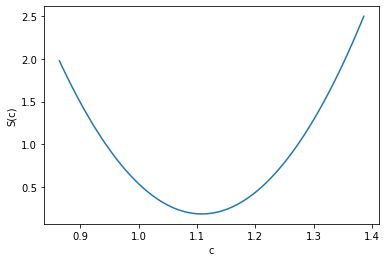

In [13]:
x = np.linspace(c_min, c_max, 100)
y = [np.sum((periodos - c) ** 2) for c in x]

plt.plot(x, y)
plt.xlabel("c")
plt.ylabel("S(c)")

Para encontrar el mínimo de esta función, derivamos e igualamos a 0:

$$\begin{align}
0 = \frac{dS}{dc} &= \frac{d}{dc} \sum_{i=1}^N (x_i - c)^2
\\&= \sum_{i=1}^N \frac{d}{dc} (x_i - c)^2
\\&= \sum_{i=1}^N -2 \, (x_i - c)
\\&= -2 \, \left( \sum_{i=1}^N x_i - \sum_{i=1}^N c \right)
\\&= -2 \, \left( \sum_{i=1}^N x_i - N c \right)
\end{align}$$

Despejando $c$, llegamos a:

$$ c = \frac{1}{N} \sum_i^N x_i $$

Es decir, el valor óptimo (en el sentido de cuadrados mínimos) es el promedio de los $x_i$, que generalmente se denota como $\bar{x}$ o $\langle x \rangle$.

NumPy incluye una función para calcularlo:

In [14]:
np.mean(periodos)

1.1083333333333334

### Medidas de dispersión

Para elegir un valor de ancho, al igual que con las medidas de centralidad, hay varias [medidas de dispersión](https://en.wikipedia.org/wiki/Statistical_dispersion#Measures), que cuantifican que tanto se apartan las mediciones entre sí, o de su centro.

La medida que es consistente con el promedio se conoce como la *varianza*, que es el promedio de las distancias cuadráticas al promedio. O, matemáticamente, que es más claro:

$$ s^2 = \frac{1}{N} \sum_i^N (x_i - \bar{x})^2 $$

*Nota: tambíen la pueden ver definida con $N-1$ en lugar de $N$, que se conoce como [la corrección de Bessel](https://en.wikipedia.org/wiki/Bessel's_correction).*

Pero **la varianza no tiene las mismas unidades** que $x_i$. Por ejemplo, si $x_i$ está en metros, la varianza estará metros cuadrados. Tomando raiz cuadrada para que tenga las mismas unidades:

$$ s = \sqrt{s^2} = \sqrt{\frac{1}{N} \sum_i^N (x_i - \bar{x})^2} $$

llegamos a lo que se conoce como la desviación estándar.

NumPy incluye funciones para calcular ambas:

In [15]:
np.var(periodos)  # variance

0.006153888888888886

In [16]:
np.std(periodos)  # standard deviation

0.07844672643832173

## Interpretación estadística

Con estas dos medidas, podemos resumir nuestras mediciones en dos números: el promedio y la desviación estandar.

In [17]:
promedio = np.mean(periodos)
desv_est = np.std(periodos)

print(f"({promedio:.3f} ± {desv_est:.3f}) s")

(1.108 ± 0.078) s


Gráficamente, podríamos pensar que estamos reemplazando nuestro histograma por el siguiente intervalo:

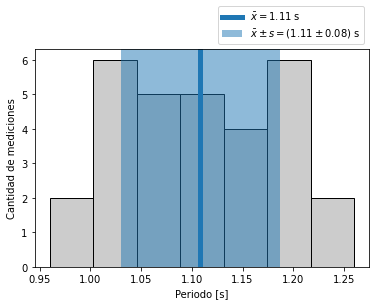

In [18]:
plt.hist(periodos, bins=7, color=(0.8, 0.8, 0.8), edgecolor="black")

plt.axvline(promedio, linewidth=5, label=f"$\\bar{{x}} = {promedio:.2f}$ s")
plt.axvspan(
    promedio - desv_est,
    promedio + desv_est,
    alpha=0.5,
    label=f"$\\bar{{x}} \pm s = ({promedio:.2f} \\pm {desv_est:.2f})$ s",
)

plt.xlabel("Periodo [s]")
plt.ylabel("Cantidad de mediciones")
plt.legend(loc="lower right", bbox_to_anchor=(1, 1));

que no captura todas las mediciones, sino una fracción de ellas.

En realidad, la interpretación, que generalmente está implicita, es que estamos aproximando nuestro histograma por una distribución *gaussiana*.

### Distribución normal o gaussiana

La distribución normal tiene la siguiente forma funcional:

$$ N(x) \propto e^{-x^2} $$

En general, se escribe con dos parámetros:

- $\mu$, que controla el centro de la distribución
- $\sigma$, que controla el ancho de la distribución

$$ N(x | \mu, \sigma) \propto \exp \left( \frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2 \right) $$

Cuanto está escrita de esta manera, podemos estimar $\mu$ y $\sigma$ como el promedio y la desviación estandar de los datos.

In [19]:
@ipywidgets.interact(mu=(-5, 5), sigma=(0.4, 3, 0.3))
def _(mu=0, sigma=1):
    x = np.linspace(-10, 10, 100)
    plt.plot(x, scipy.stats.norm.pdf(x, loc=0, scale=1), label="N(0, 1)")
    plt.plot(
        x,
        scipy.stats.norm.pdf(x, loc=mu, scale=sigma),
        label=f"N({mu:.1f}, {sigma:.1f})",
        zorder=0,
    )
    plt.ylim(-0.1, 1.1)
    plt.legend(title="$N(\mu, \sigma)$")

interactive(children=(IntSlider(value=0, description='mu', max=5, min=-5), FloatSlider(value=1.0, description=…

Cuanto está escrita de esta manera, podemos estimar $\mu$ y $\sigma$ como el promedio y la desviación estandar de los datos. Comparemos el histograma con una gaussiana:

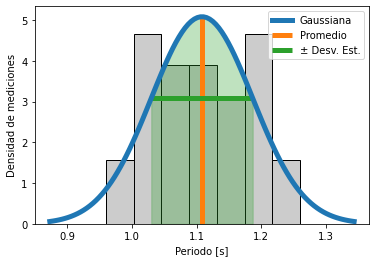

In [20]:
# Histograma normalizado
plt.hist(
    periodos, bins=7, density=True, color=(0.8, 0.8, 0.8), edgecolor="black", zorder=0
)

# Gaussiana
gaussiana = scipy.stats.norm(loc=promedio, scale=desv_est)

x = promedio + 3 * desv_est * np.linspace(-1, 1, 100)
plt.plot(x, gaussiana.pdf(x), linewidth=5, label="Gaussiana")

# Centro
plt.vlines(
    promedio, 0, gaussiana.pdf(promedio), label="Promedio", linewidth=5, color="C1"
)

# Ancho
plt.hlines(
    gaussiana.pdf(promedio + desv_est),
    promedio - desv_est,
    promedio + desv_est,
    label="± Desv. Est.",
    linewidth=5,
    color="C2",
)

x = promedio + desv_est * np.linspace(-1, 1, 100)
plt.fill_between(x, gaussiana.pdf(x), color="C2", alpha=0.3)

plt.xlabel("Periodo [s]")
plt.ylabel("Densidad de mediciones")
plt.legend();

El area verde bajo la curva azul representa aproximadamente $\frac{2}{3}$ del area total de la *gaussiana*. 

Entonces, la interpretación estadística del intervalo dado por $\bar{x} \pm s$ es que esperamos encontrar $\frac{2}{3}$ de las mediciones allí.

Podemos chequear que fracción de nuestras mediciones están en dicho intervalo:

In [21]:
cond = np.abs(periodos - promedio) < desv_est  # periodos dentro de x̄ ± s
periodos_dentro = periodos[cond]  # selecciona los periodos tal que cond == True

periodos_dentro.size / periodos.size  # proporcion de periodos dentro

0.6333333333333333

Pero, ¿por qué es razonable aproximar nuestras mediciones por una *gaussiana*?

Generalmente, se va a dar que el histograma de las mediciones tengan *forma de campana*, aunque para pocos datos no se llegue a apreciar. Cuando en una medición intervienen **múltiples fuentes de error**, la distribución de las mediciones tiende a una distribución normal o *gaussiana*.

Sin embargo, no siempre tiene sentido resumir mediciones en promedio y desviación estandar. Por ejemplo, si las mediciones fueran de los números que salen al arrojar dados, esperariamos un histograma donde todos los números del 1 al 6 tienen la misma probabilidad.

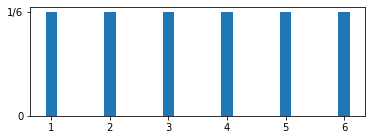

In [22]:
plt.figure(figsize=(6, 2))
plt.bar(np.arange(1, 7), 1 / 6, width=0.2)
plt.yticks((0, 1 / 6), labels=("0", "1/6"));

Pero nadie describiria el resultado como el promedio y la desviación estandar: $3.5 \pm 1.7$.

## Interpretación física

La estadística les da herramientas para analizar los datos, pero no les dice que herramienta usar ni que concluir. Es importante **interpretarlos en base a nuestro experimento**.

En nuestro experimento, tomamos $N$ mediciones $\{x_i\}$, graficamos un histograma de ellas y, luego, lo resumimos como el promedio $\bar{x}$ y la desviación estándar $s$ de los datos. Pero, ¿qué representan? ¿A qué se debe *físicamente* la dispersión en los datos?

La dispersión se debe a su tiempo de reacción, que incluye desde escuchar el chasquido hasta accionar el botón del cronómetro. En este caso, la desviación estándar está midiendo algo propio del *proceso de medición*, no de la *magnitud física* que queremos medir: el intervalo entre chasquidos tiene (o tuvo) un periodo bien definido.

Si lo que nos interesa reportar es el periodo entre chasquidos, para lo cual no vamos a reportar una única medición, sino el promedio de varias mediciones: ¿está bien usar la desviación estándar como incerteza?

La desviación estándar es **la incerteza de cada medición** $x_i$. ¿La incerteza del promedio de muchas mediciones será la misma? ¿O será menor?

## Error del promedio

Para ver cuál es el error del promedio, hagamos otro experimento, pero esta vez computacional: calcular el promedio de un conjunto cada vez más grande de datos.

En particular, generemos un millón de datos aleatorios con distribución normal $N(0, 1)$, es decir, con valor medio $\mu = 0$ y desviación estándar $\sigma = 1$:

In [23]:
x = np.random.normal(loc=0, scale=1, size=int(1e6))

Lo primero que podemos hacer es un histograma de estos datos:

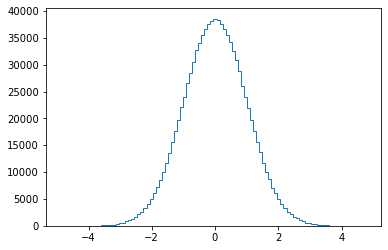

In [24]:
plt.hist(x, bins=100, histtype="step");

La distribución está centrada en 0, como era de esperarse. Podemos calcular el promedio y la desviación estándar de todos los datos:

In [25]:
np.mean(x), np.std(x)

(0.0005222635943612343, 1.000795311898529)

No dan exactamente 0 y 1, pero están bastante cerca. ¿Qué pasará en cambio si solo consideramos los 10 primeros datos?

In [26]:
np.mean(x[:10]), np.std(x[:10])

(-0.03527322727810604, 0.9262051812217468)

También están cerca de esos valores, pero no tan cerca como al considerar 1 millón.

Podemos hacer un gráfico de estos en función de la cantidad de datos que tomamos:

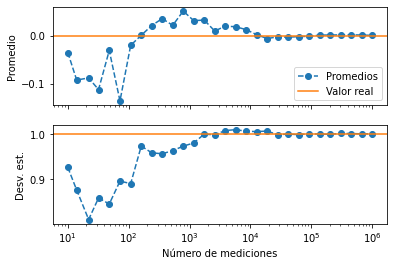

In [27]:
N = np.geomspace(10, x.size, num=30, dtype=int)
promedios = np.array([x[:n].mean() for n in N])
desv_ests = np.array([x[:n].std() for n in N])

fig, ax = plt.subplots(2, 1, sharex=True)

ax[0].semilogx(N, promedios, "o--", label="Promedios")
ax[0].axhline(0, color="C1", label="Valor real")

ax[1].semilogx(N, desv_ests, "o--")
ax[1].axhline(1, color="C1")

ax[0].set(ylabel="Promedio")
ax[1].set(ylabel="Desv. est.", xlabel="Número de mediciones")
ax[0].legend();

Al ir aumentando el número de mediciones, tanto el promedio como la desviación estándar se acercan cada vez más al *valor real*. Tiene sentido, ya que pasa lo mismo con el histograma.

In [28]:
@ipywidgets.interact(N=ipywidgets.FloatLogSlider(10, min=1, max=5))
def _(N):
    plt.hist(x, bins=100, density=True)
    plt.hist(x[: int(N)], bins="sqrt", density=True, histtype="step")
    plt.xlim(-5, 5)
    plt.ylim(0, 1)

interactive(children=(FloatLogSlider(value=10.0, description='N', max=5.0, min=1.0), Output()), _dom_classes=(…

A medida que tomamos más datos, mejor definida está la campana, tanto en su centro como en su ancho.

El error del promedio, $\sigma_{\bar{x}}$, viene dado por la siguiente formula:

$$ \sigma_{\bar{x}} = \frac{\sigma_x}{\sqrt{N}} $$

donde $\sigma_x$ es la desviación estándar de los datos $\{x_i\}$, y $N$ es la cantidad de datos promediados. Noten que este valor sí disminuye con la cantidad de mediciones $N$.

Comparemos los valores "experimentales" para el error del promedio $|\bar{x} - \mu|$ con lo esperado teóricamente, $\frac{\sigma_x}{\sqrt{N}}$.

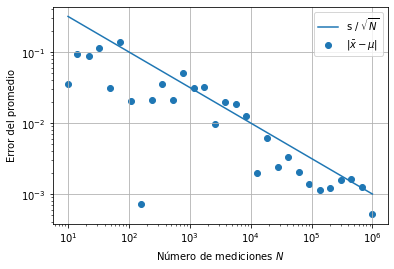

In [29]:
error_promedio = np.abs(promedios - 0)

plt.loglog(N, np.std(x) / np.sqrt(N), label=r"s / $\sqrt{N}$")
plt.scatter(N, error_promedio, label=r"$|\bar{x} - \mu|$")
plt.xlabel("Número de mediciones $N$")
plt.ylabel("Error del promedio")
plt.legend()
plt.grid()

## Reportando la magnitud

Para reportar nuestra mejor determinación del periodo entre chasquidos, usaremos el promedio y el error del promedio:

In [30]:
N = periodos.size  # Cantidad de datos
promedio = periodos.mean()
desv_est = periodos.std()  # Tiempo de respuesta
error_promedio = desv_est / np.sqrt(N)

print(f"El tiempo de respuesta de les estudiantes es {desv_est:.2f}")
print(f"El periodo entre aplausos fue: {promedio:.2f} ± {error_promedio:.2f}")

El tiempo de respuesta de les estudiantes es 0.08
El periodo entre aplausos fue: 1.11 ± 0.01
